# Preparing the data

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv('./datasets/twitter_training.csv')
data.head()

,id,context,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


We don't really need the `id` column, so we'll remove it

In [33]:
data = data.drop(['id'], axis=1)
data.head()

,context,sentiment,text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Check the number of rows in the dataset

In [34]:
len(data)

74682

In [35]:
data = data.drop_duplicates()

Number of rows after removing the duplicates

In [36]:
len(data)

71061

Check missing values in the dataset

In [37]:
data.isna().sum()

context        0
sentiment      0
text         103
dtype: int64

Drop the missing values

In [38]:
data = data.dropna()

Number of rows after dropping the missing values

In [39]:
len(data)

70958

Check the possible values for `sentiment`

In [40]:
data['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

Remove 'Irrelevant' and 'Neutral' because we're not using those labels

In [41]:
data = data.drop(data.loc[data['sentiment'] == 'Irrelevant'].index, axis=0)
data = data.drop(data.loc[data['sentiment'] == 'Neutral'].index, axis=0)

Length of the data after removing 'Irrelevant' and 'Neutral'

In [42]:
len(data)

41114

In [43]:
data.head()

,context,sentiment,text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Cleaning the `text`

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

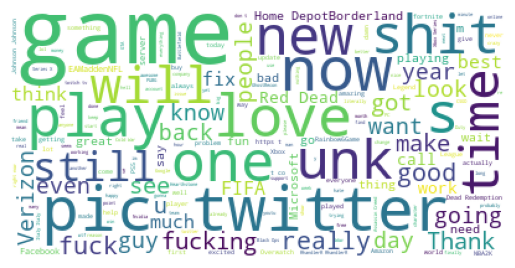

In [45]:
wordcloud = WordCloud(background_color='white').generate(' '.join(data['text'].values.tolist()))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [46]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [47]:
stop_words = stopwords.words("english")
stop_words.append("im")

In [48]:
stemmer = SnowballStemmer("english")

In [49]:
def clean_text(df: pd.DataFrame, to_clean_col: str, out_col: str):
    # Casefolding and remove extra spaces
    df[out_col] = df[to_clean_col].apply(lambda x: x.lower().strip())

    # Remove extra spaces in between
    df[out_col] = df[out_col].apply(lambda x: re.sub(' +', ' ', x))
    
    # Remove @username
    df[out_col] = df[out_col].apply(lambda x: re.sub('@\w+', ' ', x))

    # Remove punctuations
    df[out_col] = df[out_col].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

    # Remove all words with only one char in it
    df[out_col] = df[out_col].apply(lambda x: re.sub('\b\w\b', '', x))

    # Remove stopwords and stemming
    df[out_col] = df[out_col].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split() if word not in stop_words))

In [50]:
clean_text(data, 'text', 'cleaned_text')

In [51]:
data.head()

,context,sentiment,text,cleaned_text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,get borderland murder
1,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,get borderland kill
3,Borderlands,Positive,im coming on borderlands and i will murder you...,come borderland murder
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,get borderland murder


In [52]:
data['cleaned_text'].duplicated().sum()

6485

In [53]:
data = data.drop(data.loc[data['cleaned_text'].duplicated() == True].index, axis=0)
data.head()

,context,sentiment,text,cleaned_text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,get borderland murder
1,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,get borderland kill
3,Borderlands,Positive,im coming on borderlands and i will murder you...,come borderland murder
6,Borderlands,Positive,So I spent a few hours making something for fu...,spent hour make someth fun know huge fan maya ...


In [54]:
len(data)

34629

In [55]:
data['sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [56]:
data.groupby('sentiment').describe()

context                                text         \
            count unique             top  freq  count unique   
sentiment                                                      
Negative    18602     32       MaddenNFL  1444  18602  18602   
Positive    16027     32  AssassinsCreed  1145  16027  16027   

                                                                   \
                                                         top freq   
sentiment                                                           
Negative   the biggest dissappoinment in my life came out...    1   
Positive   im getting on borderlands and i will murder yo...    1   

          cleaned_text         \
                 count unique   
sentiment                       
Negative         18602  18602   
Positive         16027  16027   

                                                                   
                                                         top freq  
sentiment                                                          
Negative   biggest dissappoin life came year ago fuck bor...    1  
Positive                               get borderland murder    1

In [57]:
data['sentiment'].value_counts()

sentiment
Negative    18602
Positive    16027
Name: count, dtype: int64

In [58]:
data['sentiment'] = data['sentiment'].apply(
    lambda x: 0 if x == 'Negative' else 1)

In [59]:
data.head()

,context,sentiment,text,cleaned_text
0,Borderlands,1,im getting on borderlands and i will murder yo...,get borderland murder
1,Borderlands,1,I am coming to the borders and I will kill you...,come border kill
2,Borderlands,1,im getting on borderlands and i will kill you ...,get borderland kill
3,Borderlands,1,im coming on borderlands and i will murder you...,come borderland murder
6,Borderlands,1,So I spent a few hours making something for fu...,spent hour make someth fun know huge fan maya ...


In [60]:
data.to_csv('./datasets/cleaned_twitter_training.csv')